### Problem 1 (10 Points)

Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.

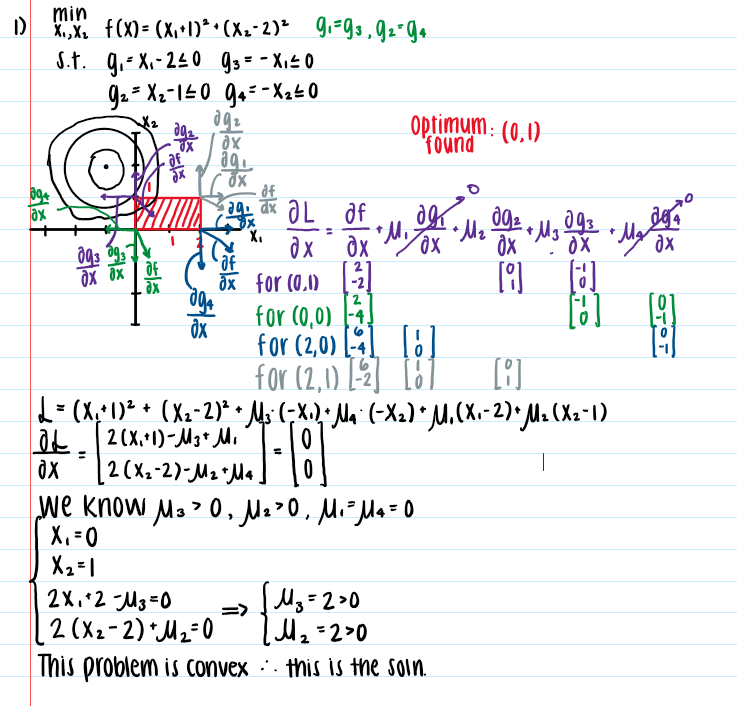

In [2]:
# Problem 1
from IPython.display import Image
Image('hw4_p1.png')

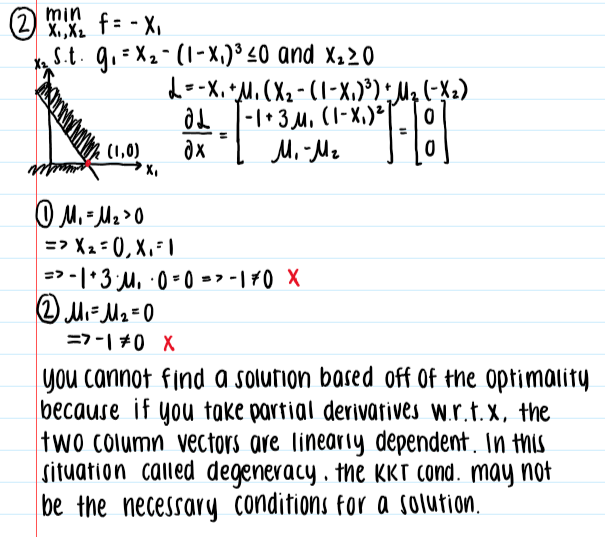

In [3]:
# Problem 2
Image('hw4_p2.png')

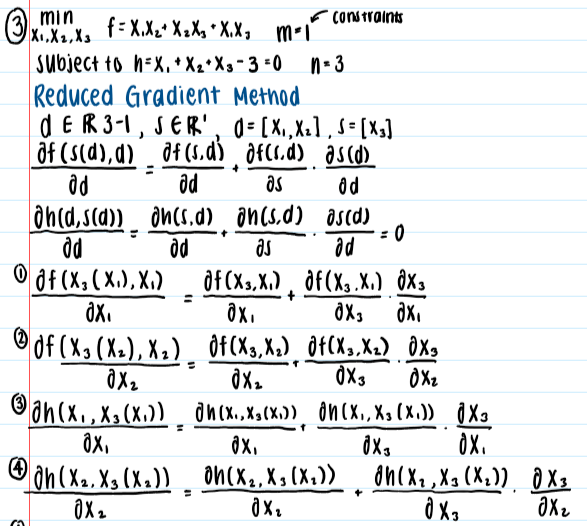

In [4]:
# Problem 3 part 1
Image('hw4_p3.png')

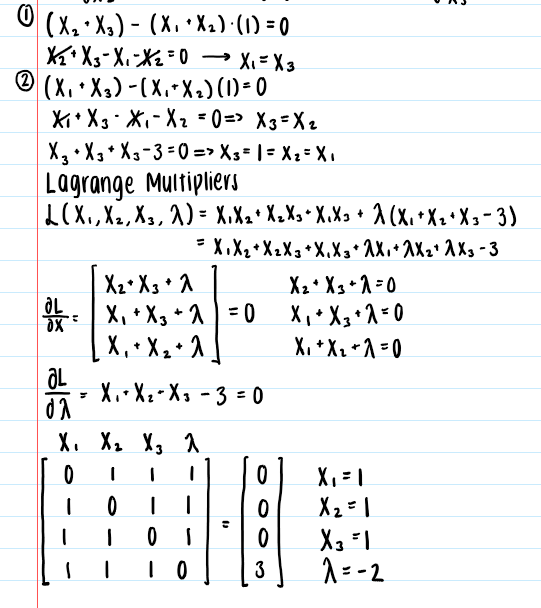

In [5]:
# Problem 3 Part 2
Image('hw4_p3_2.png')

In [150]:
# Problem 4
Image('hw4_p4.png')

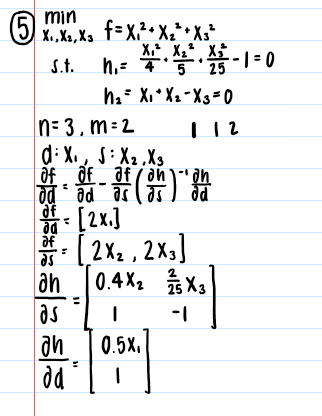

In [6]:
# Problem 5
Image('hw4_p5.png')

In [35]:
import numpy as np
# Start the counter
k = 0
# Set the error criteria
eps = 1e-3
# set initial values
s0 = [1,2]
d0 = 1
# create arrays to store the values
soln_s = [s0]
soln_d = [d0]
# Start with the first value
s = soln_s[k]
d = soln_d[k]
# Set up the partial derivatives
# 1x1 matrix
dfdd =  d*2
# 1x2 matrix
dfds =  [2*s[0], 2*s[1]]
# 2x2 matrix
dhds =  [0.4*s[0], (2/25)*s[1]] , [1, -1]
# 2x1 matrix
dhdd = [d*0.5], [1]
# Set the error function
error = np.linalg.norm(dfdd(d))**2
# Define line search
def line_search(d,s):
    # set alpha value
    a = 1
    # set b value
    b = 0.5
    # set t value
    t = 0.3
    f = lambda d,s: d**2 + s[0]**2 + s[1]**2
    phi = lambda d,s: f(d,s) + a*t*np.dot(dfdd,np.transpose(dfdd)
                                          #while f(d,s) > phi(d,s):
    while f(d,s) > phi(d,s):
        a = b*a
    return a
while error > eps:
    a = line_search(d,s)
    d = d-a*dfdd(d)
    s = s + np.dot(np.transpose(np.dot(np.linalg.inv(dhds,np.dot(dhdd,dfdd)),a)
    soln_s.append(s)
    soln_d.append(d)
    error = np.linalg.norm(dfdd(d))**2
    k = k+1
    dfdd =  d*2
    dfds =  [2*s[0], 2*s[1]]
    dhds =  [0.4*s[0], (2/25)*s[1]] , [1, -1]
    dhdd = [d*0.5], [1]
    

    

SyntaxError: invalid syntax (<ipython-input-35-160bae4fcf9e>, line 37)

In [32]:
phi(d,s)

7.2